# List of Individual Responsibilities

### Nathan Grey: construct bar graphs for FBS, SEC, Vanderbilt Football
### Harrison Rubin: revise bar and network graphs, write PDF report
### Umesh Timalsina: construct network and community cluster graphs

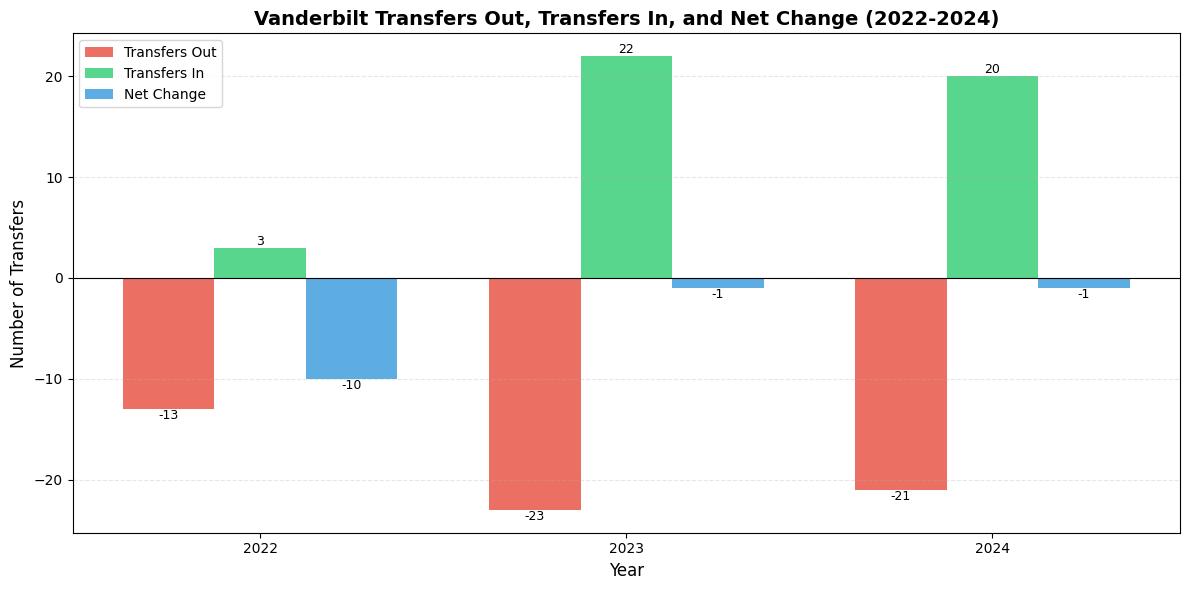

In [9]:
# Visualize Transfers out, in and net change for Vanderbilt in the years 2022-2024
# Only Vanderbilt is included in this analysis
# Completed by Nathan Grey

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in the data

df_team_metadata = pd.read_csv('./data/processed/team_metadata.csv')

# lets only look at Classification = fbs
df_team_metadata = df_team_metadata[df_team_metadata['Team'] == 'Vanderbilt']

# Extract transfer data for Vanderbilt by year
df_vandy = df_team_metadata.sort_values('Year')
years = df_vandy['Year'].astype(str).tolist()
transfers_out = [-x for x in df_vandy['Transfers_Out'].tolist()]
transfers_in = df_vandy['Transfers_In'].tolist()
net_change = df_vandy['Net_Change'].tolist()

# Create a grouped bar plot to show transfers out, transfers in, and net change over 2022-2024
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for grouped bar chart
categories = years
x = np.arange(len(categories))
width = 0.25

# Create bars for each metric
bars1 = ax.bar(x - width, transfers_out, width, label='Transfers Out', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x, transfers_in, width, label='Transfers In', color='#2ecc71', alpha=0.8)
bars3 = ax.bar(x + width, net_change, width, label='Net Change', color='#3498db', alpha=0.8)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom' if height >= 0 else 'top', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Customize the plot
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Transfers', fontsize=12)
ax.set_title('Vanderbilt Transfers Out, Transfers In, and Net Change (2022-2024)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(loc='upper left', fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0, color='black', linewidth=0.8, linestyle='-')

plt.tight_layout()
plt.show()



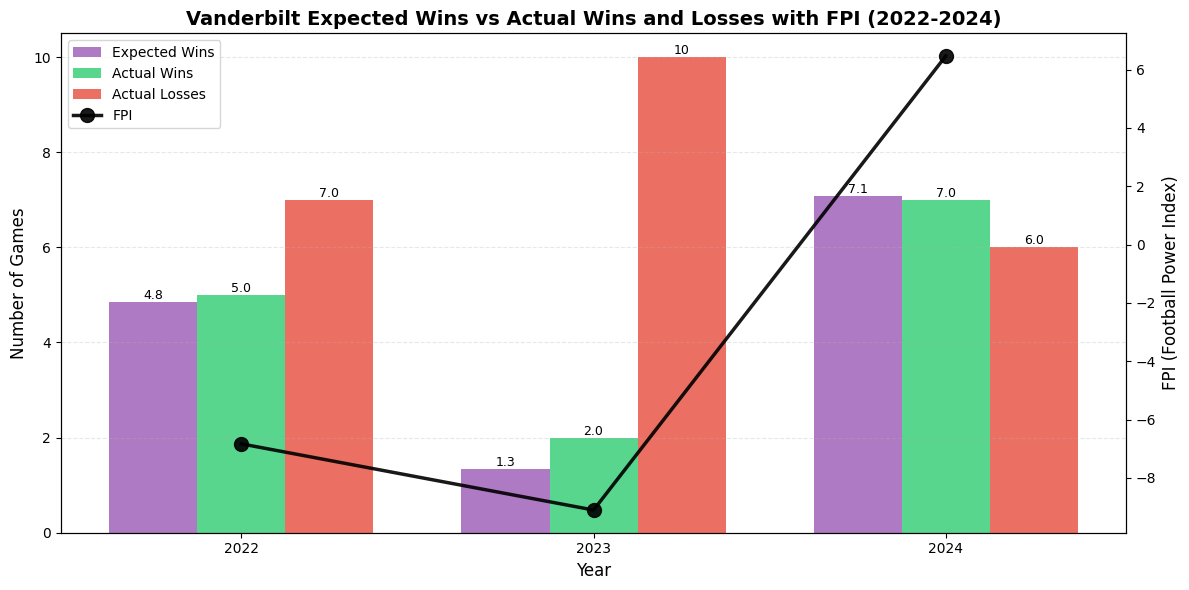

In [16]:
# Visualize Expected Wins vs Actual Wins + Losses for Vanderbilt in the years 2022-2024
# Overlaid with FPI line graph
# Only Vanderbilt is included in this analysis
# Completed by Nathan Grey

# Extract win/loss data and FPI for Vanderbilt by year
df_vandy = df_team_metadata.sort_values('Year')
years = df_vandy['Year'].astype(str).tolist()
expected_wins = df_vandy['ExpectedWins'].tolist()
actual_wins = df_vandy['Total Wins'].tolist()
actual_losses = df_vandy['Total Losses'].tolist()
total_games = df_vandy['Total Games'].tolist()
fpi_values = df_vandy['Fpi'].tolist()

# Create a grouped bar plot with secondary y-axis for FPI
fig, ax1 = plt.subplots(figsize=(12, 6))

# Prepare data for grouped bar chart
categories = years
x = np.arange(len(categories))
width = 0.25

# Create bars for each metric on primary y-axis
bars1 = ax1.bar(x - width, expected_wins, width, label='Expected Wins', color='#9b59b6', alpha=0.8)
bars2 = ax1.bar(x, actual_wins, width, label='Actual Wins', color='#2ecc71', alpha=0.8)
bars3 = ax1.bar(x + width, actual_losses, width, label='Actual Losses', color='#e74c3c', alpha=0.8)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}' if height < 10 else f'{int(height)}',
                ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Customize primary y-axis
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Games', fontsize=12, color='black')
ax1.set_title('Vanderbilt Expected Wins vs Actual Wins and Losses with FPI (2022-2024)', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Create secondary y-axis for FPI
ax2 = ax1.twinx()
ax2.plot(x, fpi_values, marker='o', linewidth=2.5, markersize=10, 
         color='black', label='FPI', alpha=0.9, linestyle='-')

# Customize secondary y-axis
ax2.set_ylabel('FPI (Football Power Index)', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()